In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [10]:
class Net(nn.Module):
    def __init__(self, in_features: int, nodes_ratio: float):
        super(Net, self).__init__()
        num_nodes = math.floor(nodes_ratio*in_features)
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, num_nodes),  # input layer
            nn.ReLU(),
            nn.Linear(num_nodes, num_nodes),    # hidden layer 1
            nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 2
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 3
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 4
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 5
#             nn.ReLU(),
            nn.Linear(num_nodes, 1)             # output layer
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = self.linear_relu_stack(X)
        return torch.sigmoid(X)

In [20]:
# kk = 0
# Kfolds = 5

# front_dir = '../data/split/outrmv-balanced/kfold'

# X_train = np.loadtxt(front_dir + f'/X_train-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# X_test = np.loadtxt(front_dir + f'/X_test-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# y_train = pd.read_csv(front_dir + f'/y_train-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)
# y_test = pd.read_csv(front_dir + f'/y_test-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)


front_dir = '../data/split/outrmv-balanced/standard'

X_train = np.loadtxt(front_dir + '/X_train.csv', delimiter=',')
X_test = np.loadtxt(front_dir + '/X_test.csv', delimiter=',')
y_train = pd.read_csv(front_dir + '/y_train.csv', index_col=0)
y_test = pd.read_csv(front_dir + '/y_test.csv', index_col=0)

y_train = y_train['class'].values
y_test = y_test['class'].values


print('---- X_train ----')
print(X_train, '\n')
print('---- X_test ----')
print(X_test, '\n')
print('---- y_train ----')
display(y_train)
print("num of HC =", len([ii for ii in y_train if ii == 0]))
print("num of PD =", len([ii for ii in y_train if ii == 1]))
print('---- y_test ----')
display(y_test)
print("num of HC =", len([ii for ii in y_test if ii == 0]))
print("num of PD =", len([ii for ii in y_test if ii == 1]))

---- X_train ----
[[ 0.          0.79722333  0.75198333 ...  6.00593333 14.35236667
  45.3448    ]
 [ 1.          0.80003333  0.66728333 ...  8.43656667  7.784
   3.66506667]
 [ 1.          0.81840333  0.70036333 ...  4.27796667  8.3208
  27.20353333]
 ...
 [ 1.          0.81763     0.80102667 ...  9.34426667 11.89356667
   4.84336667]
 [ 1.          0.81551667  0.78254667 ...  2.2162     25.66803333
  52.01246667]
 [ 0.          0.82976     0.56773    ...  4.34996667  3.50376667
   4.54426667]] 

---- X_test ----
[[ 0.          0.48761     0.69294333 ...  8.22046667  4.02796667
   3.60056667]
 [ 1.          0.78849333  0.71376333 ... 40.2442     23.1834
  59.11006667]
 [ 1.          0.7814      0.64865333 ... 12.34726667  7.78446667
   7.63273333]
 ...
 [ 0.          0.82859     0.79373    ...  5.44623333  4.57293333
   4.8214    ]
 [ 0.          0.80501     0.77377667 ...  4.79353333  5.67923333
   3.74236667]
 [ 0.          0.81984     0.55596667 ... 10.76126667  8.94413333
   9.055

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

num of HC = 150
num of PD = 150
---- y_test ----


array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

num of HC = 38
num of PD = 38


In [21]:
%%time

num_epochs = 200
nodes_ratio = 3
learning_rate = 1e-3
lambda1 = 1e-3


net = Net(in_features=X_train.shape[1], nodes_ratio=nodes_ratio)
print(net)

criterion = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

mean_tracker = []
loss_tracker = []

print("\n- learning...")
for epoch in range(num_epochs):
    # forward propagation
    y_hat = net(torch.tensor(X_train).float())
    
    # calculate loss (without l1 regularization)
    loss = criterion(torch.tensor(y_train).reshape(len(y_train), 1).float(), y_hat)
    
    # add in the l1 regularization
    l1_reg = 0
    for param in net.parameters():
        l1_reg += torch.norm(param, 1)
    loss += lambda1*l1_reg
    
    # initialize gradients to zero
    optimizer.zero_grad()
    
    # run backprop to calculate gradients
    loss.backward()
    
    # update the model parameters
    optimizer.step()
    
#     print(f"--v-- epoch {epoch} --v--")
#     print("mean(y_hat) =", y_hat.detach().numpy().mean())
#     print("Loss =", loss)
    mean_tracker.append(y_hat.detach().numpy().mean())
    loss_tracker.append(loss.item())
print("  ...done\n")

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=361, out_features=1083, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1083, out_features=1083, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1083, out_features=1, bias=True)
  )
)

- learning...
  ...done

CPU times: user 18.7 s, sys: 889 ms, total: 19.6 s
Wall time: 10.9 s


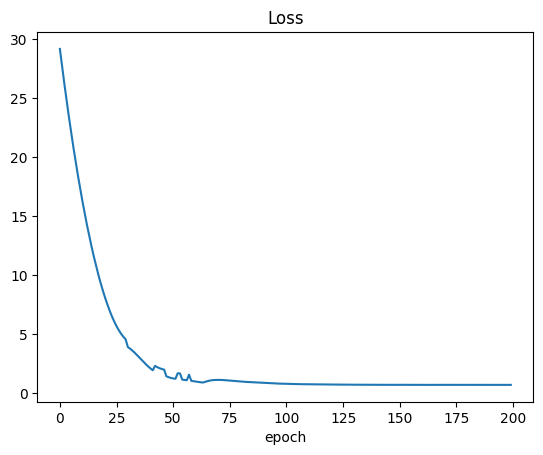

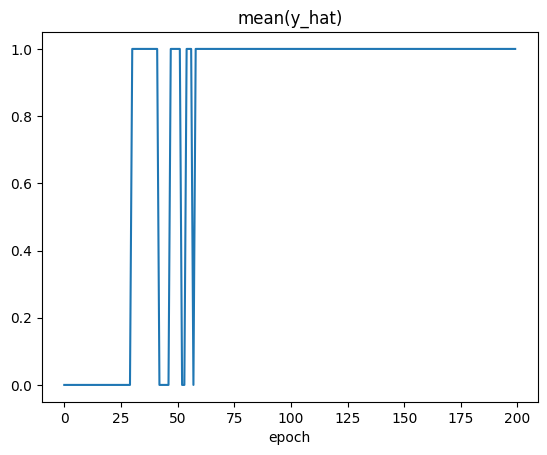

In [22]:
plt.figure()
plt.plot(np.arange(len(loss_tracker)), loss_tracker)
plt.title("Loss")
plt.xlabel("epoch")
plt.show()
plt.close()

plt.figure()
plt.plot(np.arange(len(mean_tracker)), mean_tracker)
plt.title("mean(y_hat)")
plt.xlabel("epoch")
plt.show()
plt.close()

In [ ]:
# F- I-- N---